# KNN(K Nearest Neighbors) Classification

In [70]:
#Import pandas for data handling, and load the built-in Iris dataset from scikit-learn
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [72]:
iris.feature_names      # Display the names of the features/columns in the Iris dataset

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
iris.target_names    # Display the names of the target classes (species) in the Iris dataset

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
df[df['target']==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [15]:
df[df['target']==2].tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [76]:
df0=df[:50]            # Class 0 (setosa)
df1=df[50:100]         # Class 1 (versicolor)
df2=df[100:150]        # Class 2 (virginica)

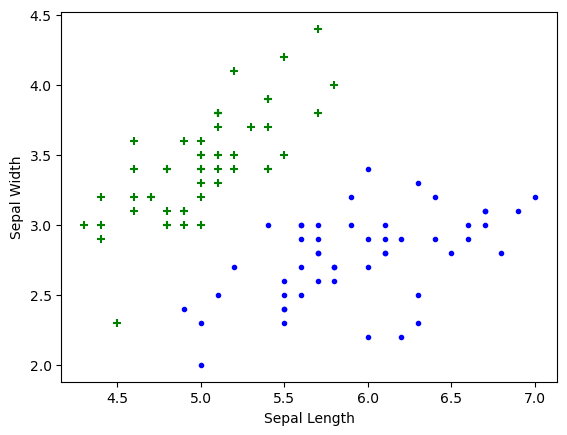

In [78]:
# Plot a scatter plot of Sepal Length vs Sepal Width for two classes with different colors and markers
import matplotlib.pyplot as plt
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue",marker='.')


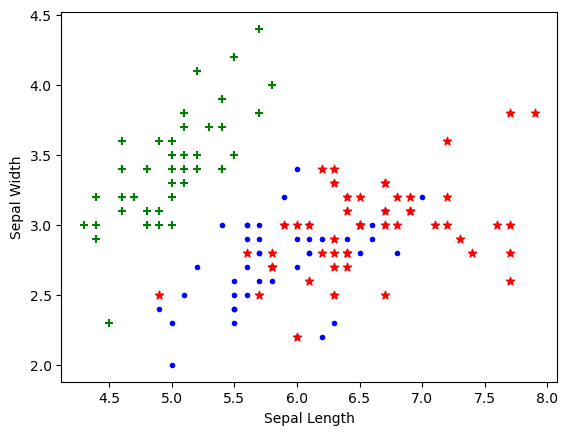

In [80]:
# Scatter plot of Sepal Length vs Sepal Width for all three Iris classes with different colors and markers
import matplotlib.pyplot as plt
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color="green",marker='+')       # Class 0
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color="blue",marker='.')        # Class 1
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'],color="red", marker='*')       # Class 2

### Train Test Split

In [85]:
# Import the function to split data into training and testing sets
from sklearn.model_selection import train_test_split

In [87]:
X=df.drop(['target','flower_name'],axis='columns')              # Features
y=df.target                                                     # Target/labels

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
len(X_train)

120

In [32]:
len(X_test)

30

### Create KNN (K Nearest Neighbors)

In [89]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7)    # KNN model looking at 7 nearest neighbors
knn.fit(X_train,y_train)                    # Train the model (stores training data)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [91]:
#Calculate the accuracy of the trained KNN model on the test data
knn.score(X_test,y_test)

0.9666666666666667

In [93]:
# Generate and display a confusion matrix to see how well the model predicted each class
from sklearn.metrics import confusion_matrix
y_pred =knn.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]])

Text(58.222222222222214, 0.5, 'Truth')

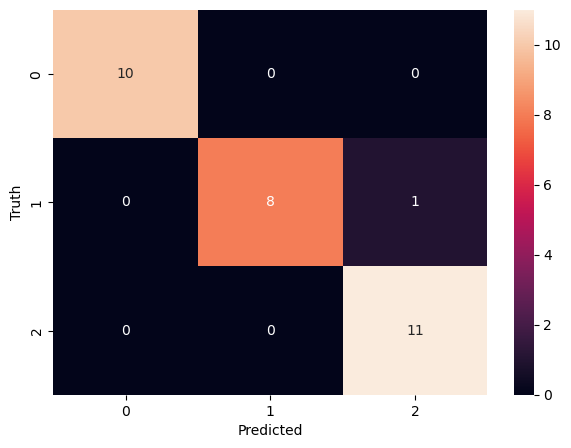

In [95]:
# Plot the confusion matrix as a heatmap to visualize correct and incorrect predictions
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [97]:
# Print a detailed report showing precision, recall, F1-score, and support for each class
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

